In [430]:
import numpy as np
from matplotlib import pyplot as plt
import skimage

In [449]:
image = skimage.io.imread("data/a10.jpg")

In [432]:
#rescaled_image = skimage.transform.rescale(image, 0.25, anti_aliasing=False)

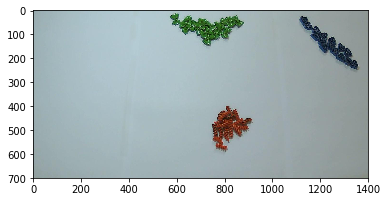

In [450]:
plt.imshow(image)

In [434]:
gray = skimage.color.rgb2gray(image)
#plt.imshow(blues, cmap="gray")

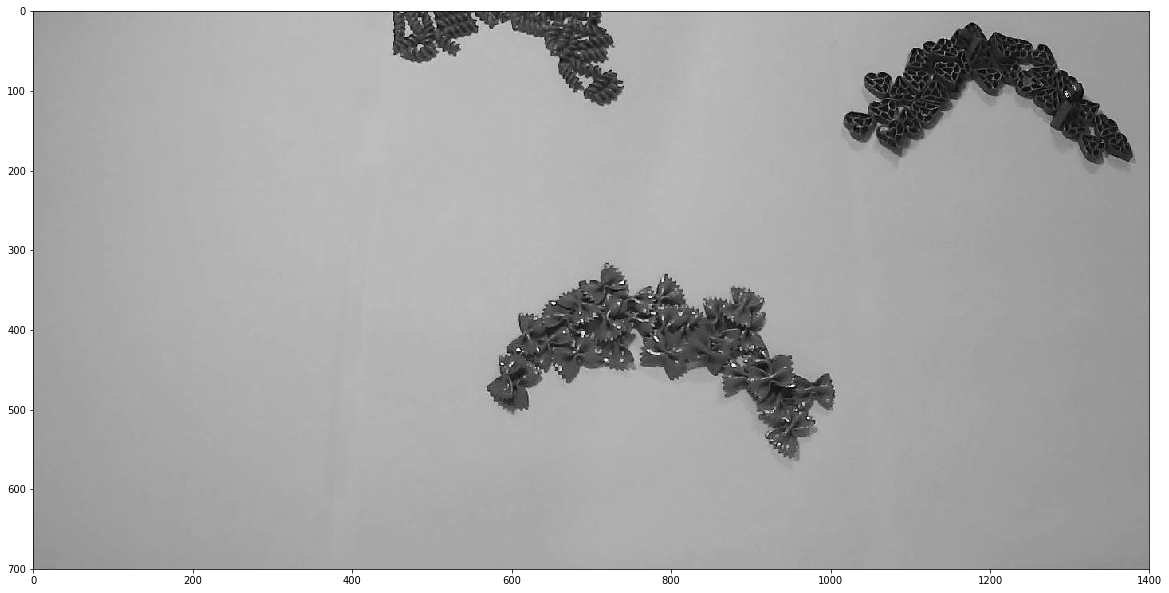

In [435]:
f, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,15))
#axes[0].imshow(red, cmap="gray")
#axes[1].imshow(green, cmap="gray")
axes.imshow(gray, cmap="gray")

In [436]:
imgBin = gray < skimage.filters.threshold_otsu(gray)

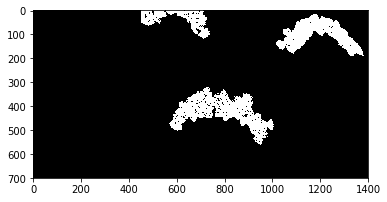

In [437]:
plt.imshow(imgBin, cmap="gray")

In [438]:
from skimage import morphology

In [439]:
imgBin = morphology.closing(imgBin, np.ones(shape=(20,20)))
#imgBin = morphology.opening(imgBin, np.ones(shape=(20,20)))

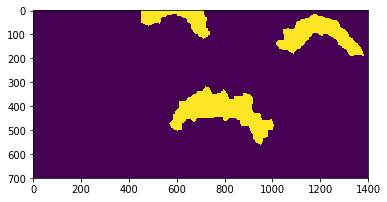

In [440]:
plt.imshow(imgBin)

In [441]:
from skimage.measure import label, regionprops
import matplotlib.patches as mpatches

def BoxFounder(imgBin, rescaled_image, Shower_Mode=False):
    label_image = label(imgBin)
    labeled_image = skimage.color.label2rgb(label_image, image= rescaled_image)
    if Shower_Mode:
        f, ax = plt.subplots(nrows=1, ncols=1)
    boxes = []
    for region in regionprops(label_image):
        if region.area > 50:
            minr, minc, maxr, maxc = region.bbox
            box = (minr, minc, maxr, maxc)
            boxes.append(box)
            if Shower_Mode:
                rect = mpatches.Rectangle((minc,minr), maxc-minc, maxr-minr, edgecolor="green", linewidth=2)
                ax.add_patch(rect)
    
    if Shower_Mode:
        ax.imshow(rescaled_image, cmap="gray")
    
    return boxes
    
    

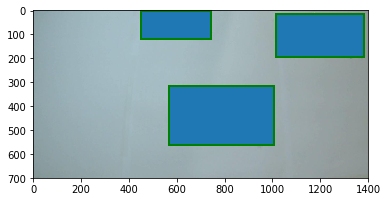

In [442]:
boxes = BoxFounder(imgBin, image, Shower_Mode=True)
#print(boxes)

In [443]:
def CropImage(rescaled_image, boxes):
    CroppedImages = []
    for box in boxes:
        minr, minc, maxr, maxc = box
        cropped_image = rescaled_image[minr:maxr+10,minc-10:maxc+10,:]
        CroppedImages.append(cropped_image)
    
    for i,image in enumerate(CroppedImages):
        skimage.io.imsave("data/RGB/o_{}.jpg".format(i), image)
        
    print(len(CroppedImages))
    
        

In [444]:
CropImage(image, boxes)

3
